# HW 01 Problem 2
This notebook is used to show the implementation of decision tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from decision_tree import entropy, majority_error, gini_index, compute_gain
from decision_tree import DecisionTree
from decision_tree import dtree_accuracy

In [3]:
from utils import most_common_str, replace_with_common

## Problem 2.2

In [4]:
# read and format train data

# define column names
cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']

# read train data
df_train = pd.read_csv('./car/train.csv', header=None)
df_train.columns = cols

# factorize labels
df_train['label'], legend = df_train['label'].factorize()

# create label legend
legend_dict={}
for i, item in enumerate(legend):
    legend_dict[item]=i

# get train data
X_train = df_train.drop('label', axis=1).values
y_train = df_train['label'].values

In [5]:
# read and format test data
df_test = pd.read_csv('./car/test.csv', header=None)
df_test.columns = cols
df_test['label'] = df_test['label'].apply(lambda x:legend_dict[x])

# get test data
X_test = df_test.drop('label', axis=1).values
y_test = df_test['label'].values

In [6]:
# vary gain function, and depth [1, 6]
r_train, r_test = dtree_accuracy(X_train, y_train, 
                                   X_test, y_test, 
                                   functions=[entropy, majority_error, gini_index], 
                                   depths=np.arange(1, 7))

df_train_results = pd.DataFrame(r_train)
df_test_results = pd.DataFrame(r_test)

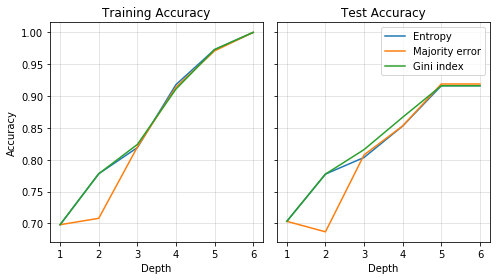

In [7]:
# plot results
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))

for h in ['entropy', 'majority_error', 'gini_index']:
    ax[0].plot(df_train_results['depth'], df_train_results[h], label=h.replace('_', ' ').capitalize())
    ax[1].plot(df_test_results['depth'], df_test_results[h], label=h.replace('_', ' ').capitalize())

for i in range(2):
    ax[i].grid(alpha=0.4)
    ax[i].set_xlabel('Depth')

ax[0].set_ylabel('Accuracy')

ax[0].set_title('Training Accuracy')
ax[1].set_title('Test Accuracy')

ax[1].legend()
fig.tight_layout()

plt.savefig('p_2_2.png', bbox_inches='tight')

plt.show()

In [8]:
df_results = pd.merge(df_train_results, df_test_results, on='depth')
df_results = df_results[['depth', 'entropy_x', 'entropy_y', 'majority_error_x', 'majority_error_y', 'gini_index_x', 'gini_index_y']]
df_results.to_csv('problem_2_2.csv', index=False)

df_results.round(3)

,depth,entropy_x,entropy_y,majority_error_x,majority_error_y,gini_index_x,gini_index_y
0,1,0.698,0.703,0.698,0.703,0.698,0.703
1,2,0.778,0.777,0.708,0.687,0.778,0.777
2,3,0.819,0.804,0.820,0.808,0.824,0.816
3,4,0.918,0.853,0.914,0.853,0.911,0.867
4,5,0.973,0.916,0.971,0.919,0.973,0.916
5,6,1.000,0.916,1.000,0.919,1.000,0.916


## Problem 2.3a

In [9]:
# format training data
cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

df = pd.read_csv('./bank/train.csv', header=None)
df.columns = cols

# format data
df['y'], legend = df['y'].factorize()

legend_dict={}
for i, item in enumerate(legend):
    legend_dict[item]=i

X_train = df.drop('y', axis=1).values
y_train = df['y'].values

In [10]:
# format test data
df_test = pd.read_csv('./bank/test.csv', header=None)
df_test.columns = cols
df_test['y'] = df_test['y'].apply(lambda x:legend_dict[x])

X_test = df_test.drop('y', axis=1).values
y_test = df_test['y'].values

In [11]:
# vary gain function, and depth [1, 16]
r_train, r_test = {}, {}
r_train, r_test = dtree_accuracy(X_train, y_train, 
                                   X_test, y_test, 
                                   functions=[entropy, majority_error, gini_index], 
                                   depths=np.arange(1, 17))

df_train_results = pd.DataFrame(r_train)
df_test_results = pd.DataFrame(r_test)

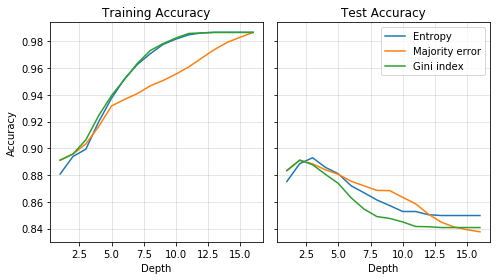

In [12]:
# plot resutls
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))

for h in ['entropy', 'majority_error', 'gini_index']:
    ax[0].plot(df_train_results['depth'], df_train_results[h], label=h.replace('_', ' ').capitalize())
    ax[1].plot(df_test_results['depth'], df_test_results[h], label=h.replace('_', ' ').capitalize())

for i in range(2):
    ax[i].grid(alpha=0.4)
    ax[i].set_xlabel('Depth')

ax[0].set_ylabel('Accuracy')

ax[0].set_title('Training Accuracy')
ax[1].set_title('Test Accuracy')

ax[1].legend()
fig.tight_layout()

plt.savefig('p_2_3a.png', bbox_inches='tight')

plt.show()

In [13]:
df_results = pd.merge(df_train_results, df_test_results, on='depth')
df_results = df_results[['depth', 'entropy_x', 'entropy_y', 'majority_error_x', 'majority_error_y', 'gini_index_x', 'gini_index_y']]
df_results.to_csv('problem_2_3a.csv', index=False)

df_results.round(3)

,depth,entropy_x,entropy_y,majority_error_x,majority_error_y,gini_index_x,gini_index_y
0,1,0.881,0.875,0.891,0.883,0.891,0.883
1,2,0.894,0.889,0.896,0.891,0.896,0.891
2,3,0.899,0.893,0.903,0.888,0.906,0.888
3,4,0.920,0.886,0.916,0.884,0.925,0.881
4,5,0.938,0.881,0.932,0.881,0.940,0.874
5,6,0.952,0.872,0.937,0.875,0.952,0.863
6,7,0.963,0.867,0.941,0.872,0.964,0.855
7,8,0.971,0.861,0.947,0.869,0.973,0.849
8,9,0.978,0.857,0.951,0.868,0.978,0.848
9,10,0.982,0.853,0.956,0.863,0.983,0.845


## Problem 2.3b

In [14]:
# format training data
cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

df = pd.read_csv('./bank/train.csv', header=None)
df.columns = cols

df['y'], legend = df['y'].factorize()

legend_dict={}
for i, item in enumerate(legend):
    legend_dict[item]=i

In [15]:
# format test data
df_test = pd.read_csv('./bank/test.csv', header=None)
df_test.columns = cols
df_test['y'] = df_test['y'].apply(lambda x:legend_dict[x])

In [16]:
# get most common string
common_str = most_common_str(df, exclude='unknown')

# replace unknown values with most common values in both the train and test sets
df_train = replace_with_common(df, common_str)
df_test = replace_with_common(df_test, common_str)

In [17]:
# trainig data
X_train = df.drop('y', axis=1).values
y_train = df['y'].values

# test data
X_test = df_test.drop('y', axis=1).values
y_test = df_test['y'].values

In [18]:
# vary gain function, and depth [1, 16]
r_train, r_test = {}, {}
r_train, r_test = dtree_accuracy(X_train, y_train, 
                                   X_test, y_test, 
                                   functions=[entropy, majority_error, gini_index], 
                                   depths=np.arange(1, 17))

df_train_results = pd.DataFrame(r_train)
df_test_results = pd.DataFrame(r_test)

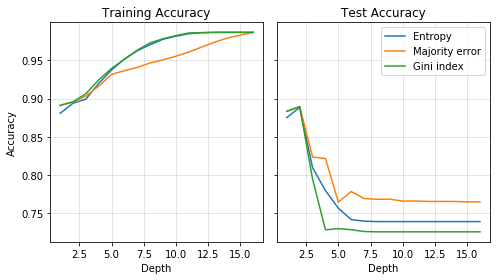

In [19]:
# plot results
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))

for h in ['entropy', 'majority_error', 'gini_index']:
    ax[0].plot(df_train_results['depth'], df_train_results[h], label=h.replace('_', ' ').capitalize())
    ax[1].plot(df_test_results['depth'], df_test_results[h], label=h.replace('_', ' ').capitalize())

for i in range(2):
    ax[i].grid(alpha=0.4)
    ax[i].set_xlabel('Depth')

ax[0].set_ylabel('Accuracy')

ax[0].set_title('Training Accuracy')
ax[1].set_title('Test Accuracy')

ax[1].legend()
fig.tight_layout()

plt.savefig('p_2_3b.png', bbox_inches='tight')

plt.show()

In [20]:
df_results = pd.merge(df_train_results, df_test_results, on='depth')
df_results = df_results[['depth', 'entropy_x', 'entropy_y', 'majority_error_x', 'majority_error_y', 'gini_index_x', 'gini_index_y']]
df_results.to_csv('problem_2_3b.csv', index=False)

df_results.round(3)

,depth,entropy_x,entropy_y,majority_error_x,majority_error_y,gini_index_x,gini_index_y
0,1,0.881,0.875,0.891,0.883,0.891,0.883
1,2,0.894,0.889,0.896,0.890,0.896,0.890
2,3,0.899,0.810,0.903,0.824,0.906,0.795
3,4,0.920,0.780,0.916,0.822,0.925,0.728
4,5,0.938,0.757,0.932,0.764,0.940,0.730
5,6,0.952,0.742,0.937,0.778,0.952,0.728
6,7,0.963,0.740,0.941,0.769,0.964,0.726
7,8,0.971,0.739,0.947,0.768,0.973,0.726
8,9,0.978,0.739,0.951,0.768,0.978,0.726
9,10,0.982,0.739,0.956,0.766,0.983,0.726
